In [ ]:
! apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

In [ ]:
pip install SciencePlots

In [ ]:
import pandas as pd
import scienceplots

In [ ]:
df = pd.read_csv('/content/fertility.csv')

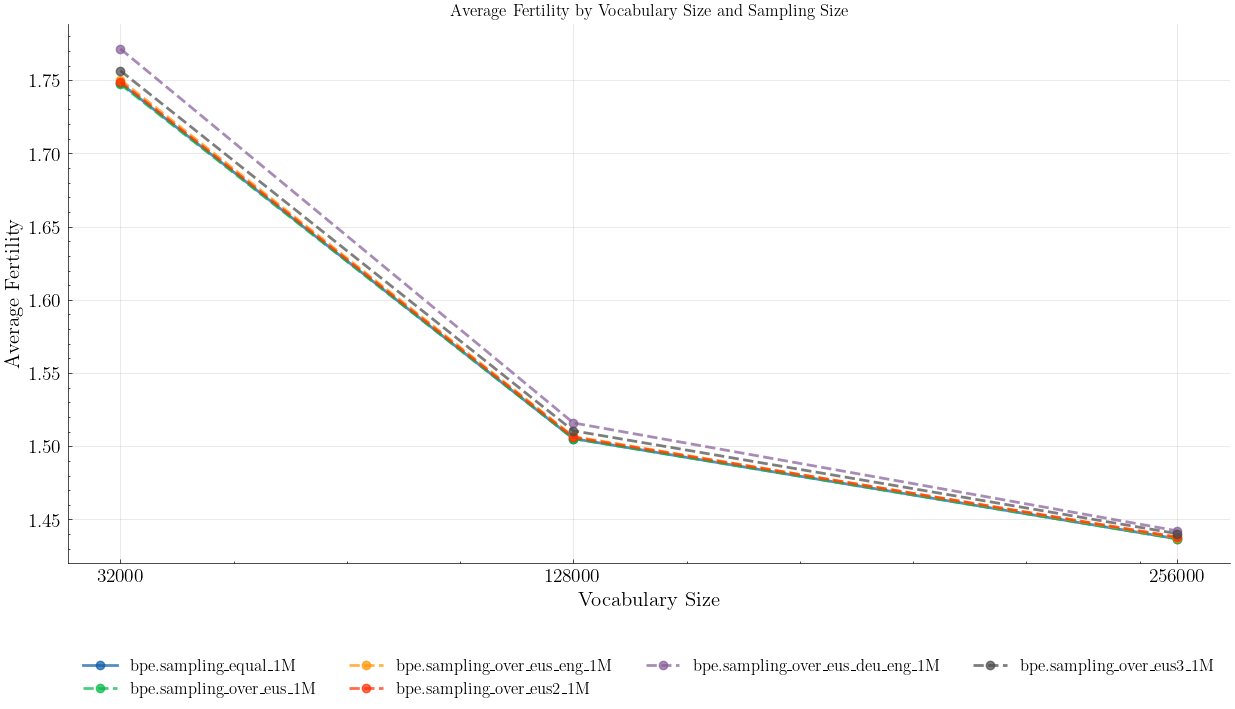

In [ ]:
import matplotlib.pyplot as plt
import re

def extract_and_plot_data(df, column_regex=r'(unigram\.\d+M)_(\d+)'):
    """
    Extracts data from specified columns in the dataframe and prepares it for plotting.
    Each unique prefix in the column names will correspond to a line in the plot,
    with x-axis as vocabulary size and y-axis as the mean value across all entries for that column.

    Args:
    - df: Pandas DataFrame containing the data.
    - column_regex: Regular expression to match and extract the prefix and vocab size from column names.

    Returns:
    - plot_data: A dictionary with prefixes as keys and their corresponding vocab sizes and mean values.
    """
    import re

    # Compile the regular expression for matching column names
    column_patterns = re.compile(column_regex)

    # Initialize a dictionary to hold the data for plotting
    plot_data = {}

    # Process each column to organize data for plotting
    for column in df.columns[1:]:  # Skip the first column assuming it's not part of the data to be plotted
        match = column_patterns.match(column)
        if match:
            prefix, vocab_size = match.groups()
            vocab_size = int(vocab_size)  # Convert vocab size to integer for sorting and plotting
            if prefix not in plot_data:
                plot_data[prefix] = {'vocab_sizes': [], 'values': []}
            plot_data[prefix]['vocab_sizes'].append(vocab_size)
            plot_data[prefix]['values'].append(df[column].mean())  # Using mean values across entries for simplicity

    # Sorting vocab_sizes for each prefix to ensure correct plotting
    for prefix in plot_data.keys():
        sorted_indexes = sorted(range(len(plot_data[prefix]['vocab_sizes'])), key=lambda x: plot_data[prefix]['vocab_sizes'][x])
        plot_data[prefix]['vocab_sizes'] = [plot_data[prefix]['vocab_sizes'][i] for i in sorted_indexes]
        plot_data[prefix]['values'] = [plot_data[prefix]['values'][i] for i in sorted_indexes]

    return plot_data


data_plot = extract_and_plot_data(df, column_regex=r'(.+)_(\d+)$')

# Plotting
plt.figure(figsize=(15, 7))
plt.style.use(['science'])
for prefix, data in data_plot.items():
  if '2M' in prefix or '4M' in prefix or '6M' in prefix  or 'unigram' in prefix:
    pass
  else:
    #print(prefix)
    if 'bpe' in prefix:
      if 'over' in prefix:
        plt.plot(data['vocab_sizes'], data['values'], marker='o', label=prefix, alpha=0.7, linestyle='--', linewidth=2)
      else:
        plt.plot(data['vocab_sizes'], data['values'], marker='o', label=prefix, alpha=0.7, linewidth=2)
    else:
      if 'over' in prefix:
        plt.plot(data['vocab_sizes'], data['values'], marker='x', label=prefix, alpha=0.7, linestyle='--', linewidth=2)
      else:
        plt.plot(data['vocab_sizes'], data['values'], marker='x', label=prefix, alpha=0.7, linewidth=2)

plt.xlabel('Vocabulary Size', size=15)
plt.ylabel('Average Fertility', size=15)
plt.title('Average Fertility by Vocabulary Size and Sampling Size')
plt.legend()
plt.grid(True)
plt.xticks(data['vocab_sizes'])  # Set xticks to the available vocabulary sizes

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=14)
# Only show ticks on the left and bottom spines
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize=12)
plt.grid(True, linestyle='-', alpha=0.4)
plt.savefig('average_feritlity.png', dpi = 350)
plt.show()

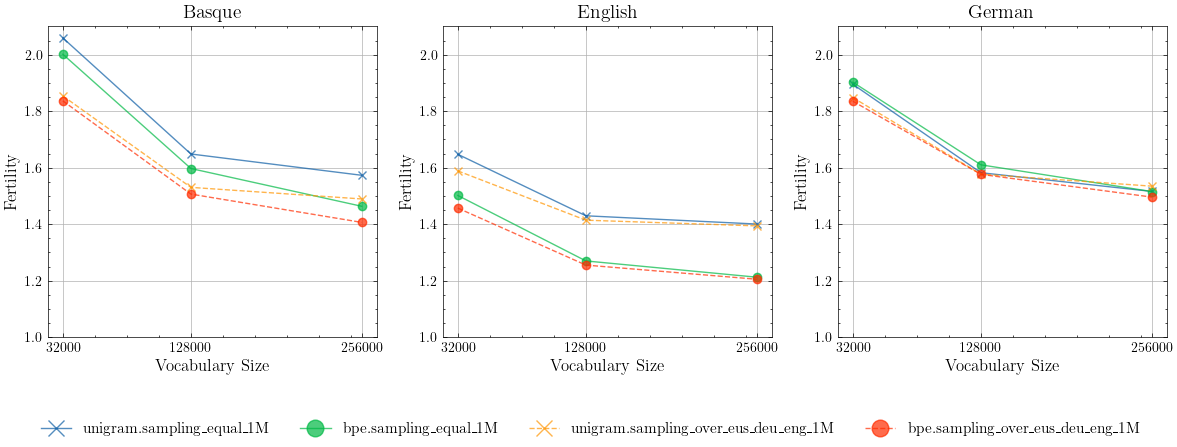

In [ ]:
from typing_extensions import ParamSpecArgs
def plot_data_by_language_side_by_side(df, langs, plot_name, column_regex=r'(.+)_(\d+)$'):
    """
    Adjusts the function to plot data for each language side by side in a single figure.
    Each subplot represents a language with lines for each vocabulary size and value.

    Args:
    - df: Pandas DataFrame containing the data.
    - column_regex: Regular expression to match and extract the part of interest and vocab size from column names.

    The function directly plots the data and does not return any value.
    """
    import re
    import matplotlib.pyplot as plt

    # Compile the regular expression for matching column names
    column_patterns = re.compile(column_regex)

    # Initialize a dictionary to hold the data for plotting by language
    plot_data = {lang: {} for lang in df['Language']}

    # Process each column to organize data for plotting
    for column in df.columns[1:]:  # Skip the 'Language' column
        match = column_patterns.match(column)
        if match:
            prefix, vocab_size = match.groups()
            vocab_size = int(vocab_size)  # Convert vocab size to integer for sorting and plotting

            for index, row in df.iterrows():
                language = row['Language']
                if prefix not in plot_data[language]:
                    plot_data[language][prefix] = {'vocab_sizes': [], 'values': []}
                plot_data[language][prefix]['vocab_sizes'].append(vocab_size)
                plot_data[language][prefix]['values'].append(row[column])

    # Determine subplot layout
    num_languages = len(df['Language'])
    cols = 3  # Number of columns in the subplot grid
    rows = 1
    plot_data = {k:v for k, v in plot_data.items() if k in langs}
    fig = plt.figure(figsize=(12, 4))  # Adjust overall figure size
    plt.style.use(['science'])
    for i, (language, prefixes) in enumerate(plot_data.items(), start=1):
        ax = plt.subplot(rows, cols, i)
        for prefix, data in prefixes.items():
            # Sorting vocab_sizes for each prefix to ensure correct plotting
            sorted_indexes = sorted(range(len(data['vocab_sizes'])), key=lambda x: data['vocab_sizes'][x])
            sorted_vocab_sizes = [data['vocab_sizes'][i] for i in sorted_indexes]
            sorted_values = [data['values'][i] for i in sorted_indexes]
            if '2M' in prefix or '4M' in prefix or '6M' in prefix  or 'unigram' in prefix:
              pass
            if prefix not in ['unigram.sampling_equal_1M', 'bpe.sampling_equal_1M', 'bpe.sampling_over_eus_deu_eng_1M', 'unigram.sampling_over_eus_deu_eng_1M']:
              pass
            else:
              if 'bpe' in prefix:
                if 'over' in prefix:
                  ax.plot(sorted_vocab_sizes, sorted_values, marker='o', label=prefix, alpha=0.7, linestyle='--' )
                else:
                  ax.plot(sorted_vocab_sizes, sorted_values, marker='o', label=prefix, alpha=0.7)
              else:
                if 'over' in prefix:
                  ax.plot(sorted_vocab_sizes, sorted_values, marker='x', label=prefix, alpha=0.7, linestyle='--' )
                else:
                  ax.plot(sorted_vocab_sizes, sorted_values, marker='x', label=prefix, alpha=0.7)

        ax.set_title(language, fontsize=14)
        ax.set_xlabel('Vocabulary Size', fontsize=12)
        ax.set_ylabel('Fertility', fontsize=12)
        ax.set_ylim(1, 2.1)
        ax.grid(True)
        ax.set_xticks(sorted_vocab_sizes)  # Assuming vocab sizes are consistent across prefixes
        #if i == num_languages:  # Add legend to the last plot for clarity
        #    ax.legend()

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15), fontsize=11, markerscale=2 ) # bbox_to_anchor=(-0.5, -0.5)
    plt.tight_layout()
    plt.savefig('fertility_per_language_{}.pdf'.format(plot_name), dpi = 300)
    plt.show()

# Now, let's call the function to plot the data side by side
#plot_data_by_language_side_by_side(df, ['Spanish', 'Catalan', 'Portuguese'], plot_name='f1', column_regex=r'(.+)_(\d+)$')

#plot_data_by_language_side_by_side(df, ['Italian', 'Galician', 'French'], plot_name='f2', column_regex=r'(.+)_(\d+)$')

plot_data_by_language_side_by_side(df, ['Basque', 'English', 'German'], plot_name='f3', column_regex=r'(.+)_(\d+)$')

In [ ]:
def get_fertility_per_language(df, column_regex=r'(.+)_(\d+)$'):
    """
    Adjusts the function to plot data for each language side by side in a single figure.
    Each subplot represents a language with lines for each vocabulary size and value.

    Args:
    - df: Pandas DataFrame containing the data.
    - column_regex: Regular expression to match and extract the part of interest and vocab size from column names.

    The function directly plots the data and does not return any value.
    """
    import re
    import matplotlib.pyplot as plt

    # Compile the regular expression for matching column names
    column_patterns = re.compile(column_regex)

    # Initialize a dictionary to hold the data for plotting by language
    plot_data = {lang: {} for lang in df['Language']}

    # Process each column to organize data for plotting
    for column in df.columns[1:]:  # Skip the 'Language' column
        match = column_patterns.match(column)
        if match:
            prefix, vocab_size = match.groups()
            vocab_size = int(vocab_size)  # Convert vocab size to integer for sorting and plotting

            for index, row in df.iterrows():
                language = row['Language']
                if prefix not in plot_data[language]:
                    plot_data[language][prefix] = {'vocab_sizes': [], 'values': []}
                plot_data[language][prefix]['vocab_sizes'].append(vocab_size)
                plot_data[language][prefix]['values'].append(row[column])
    return plot_data

In [ ]:
data = get_fertility_per_language(df, column_regex=r'(.+)_(\d+)$')

Computing relative fertility for unigram.sampling_equal_1M


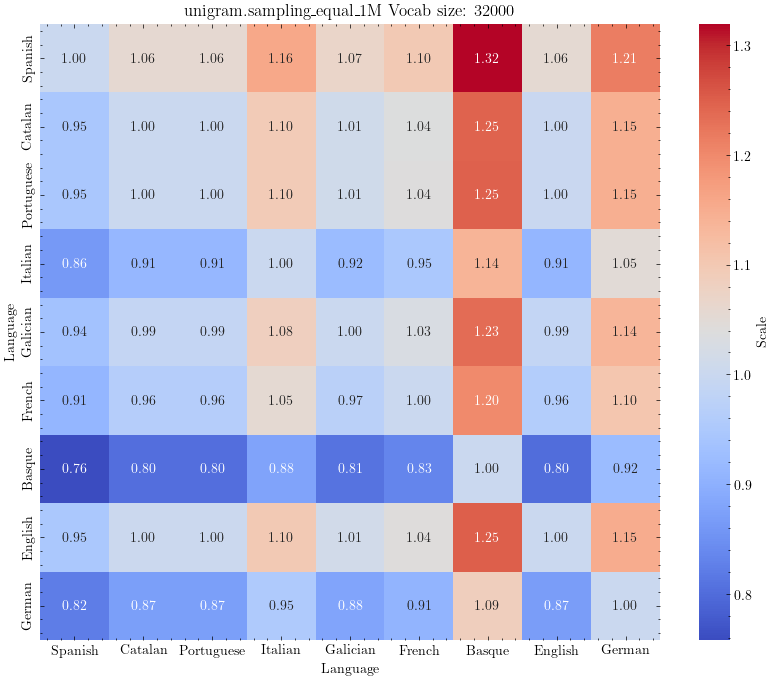

Computing relative fertility for unigram.sampling_equal_2M


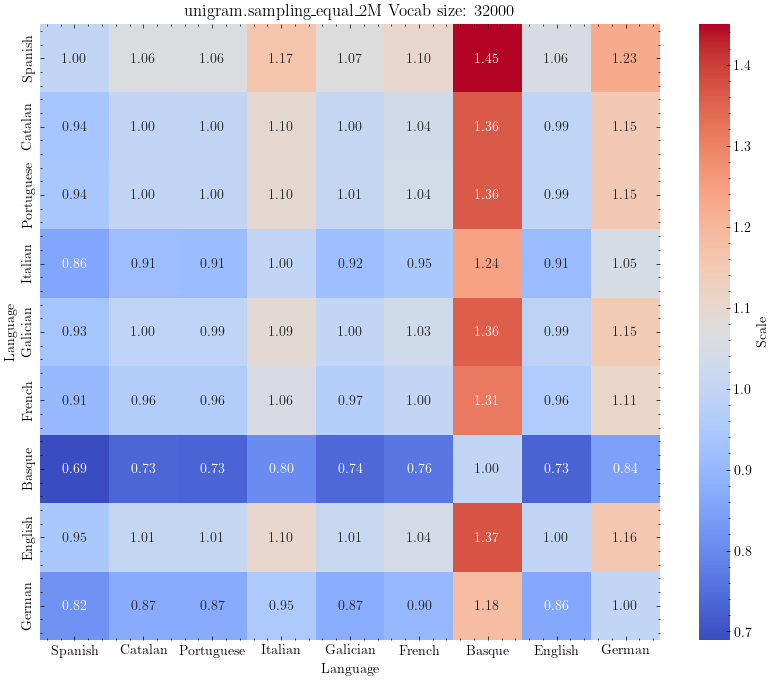

Computing relative fertility for unigram.sampling_equal_4M


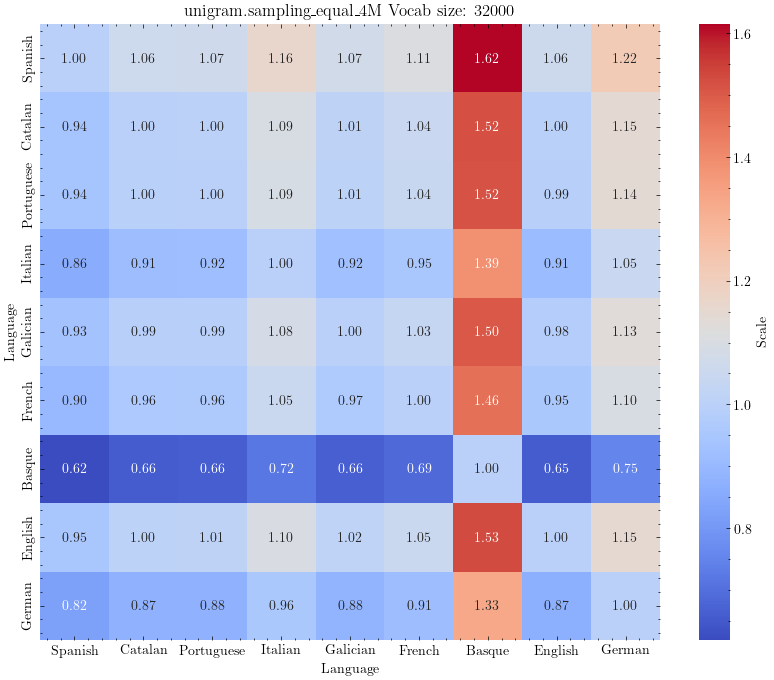

Computing relative fertility for unigram.sampling_equal_6M


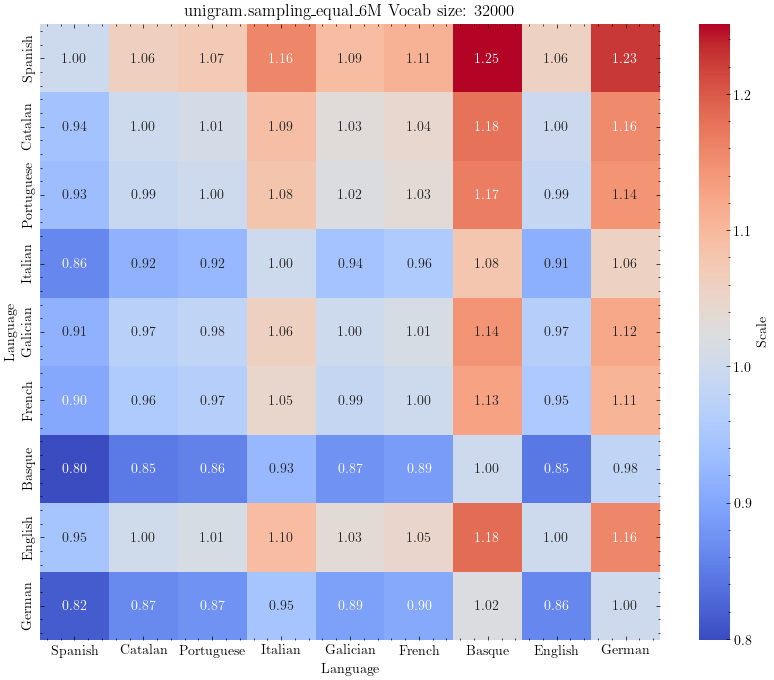

Computing relative fertility for bpe.sampling_equal_1M


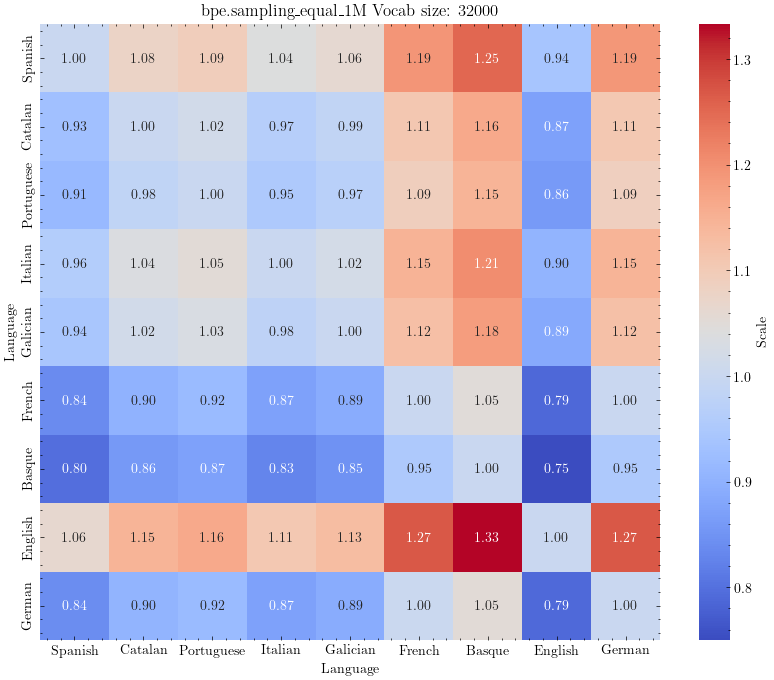

Computing relative fertility for bpe.sampling_equal_2M


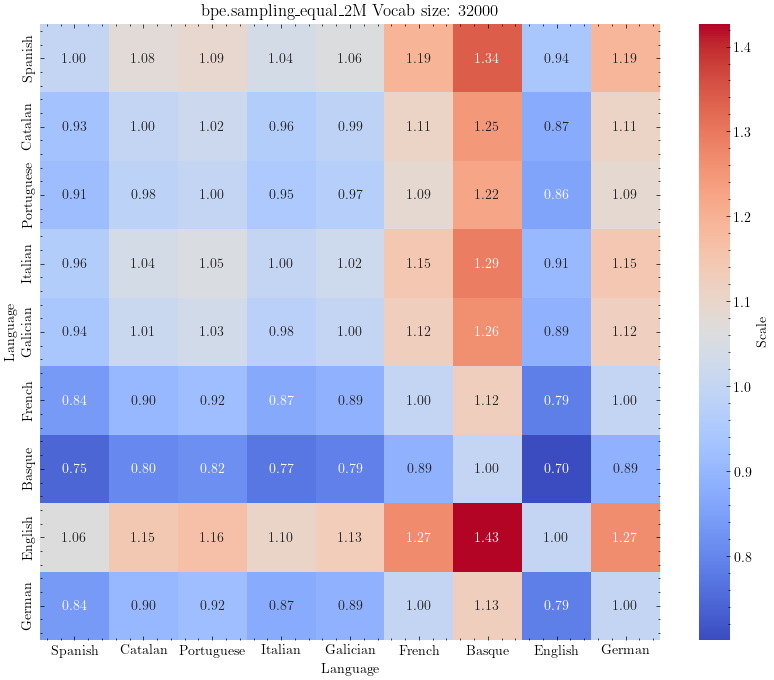

Computing relative fertility for bpe.sampling_equal_4M


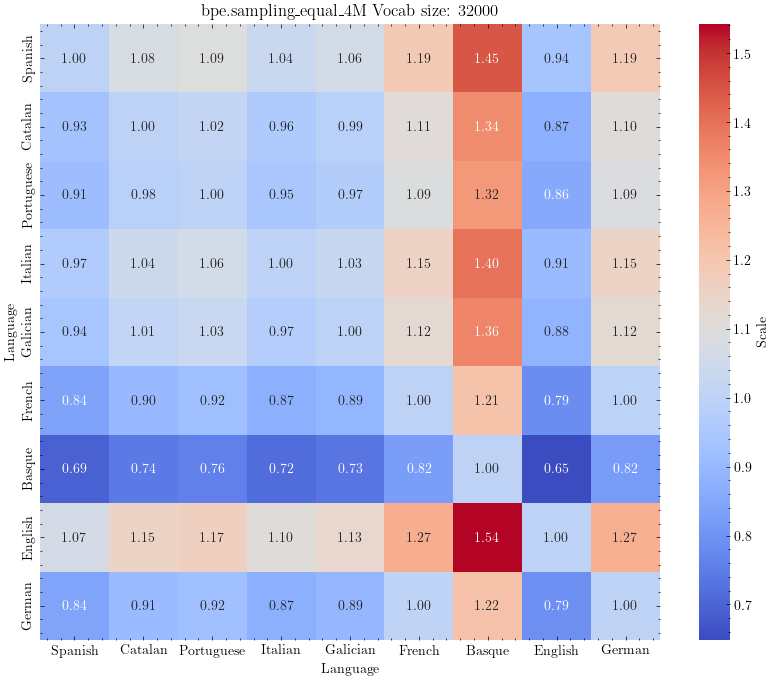

Computing relative fertility for bpe.sampling_equal_6M


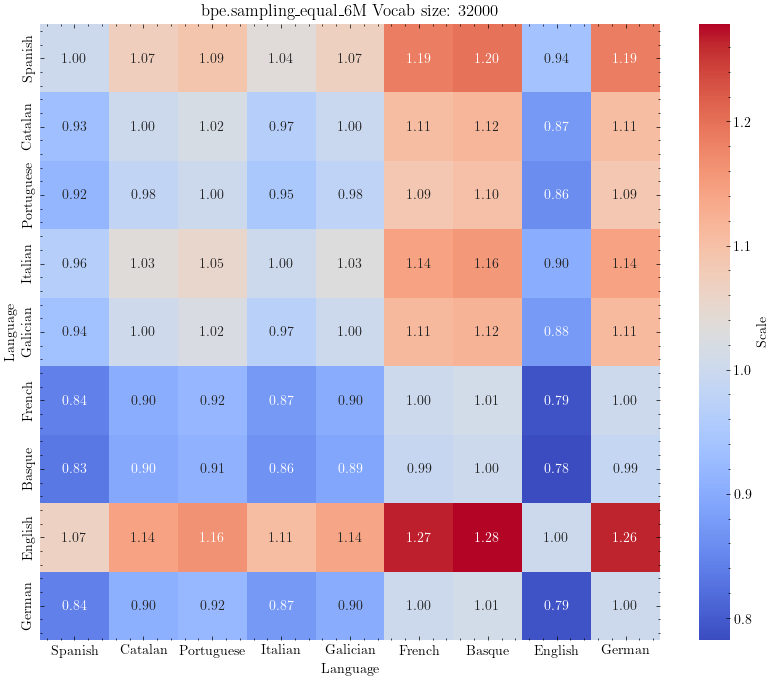

Computing relative fertility for unigram.sampling_over_eus_1M


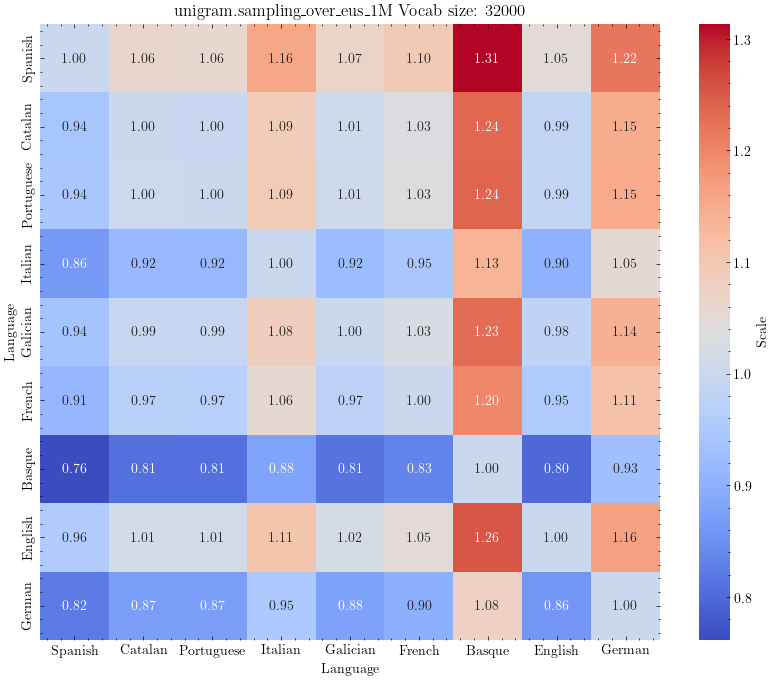

Computing relative fertility for bpe.sampling_over_eus_1M


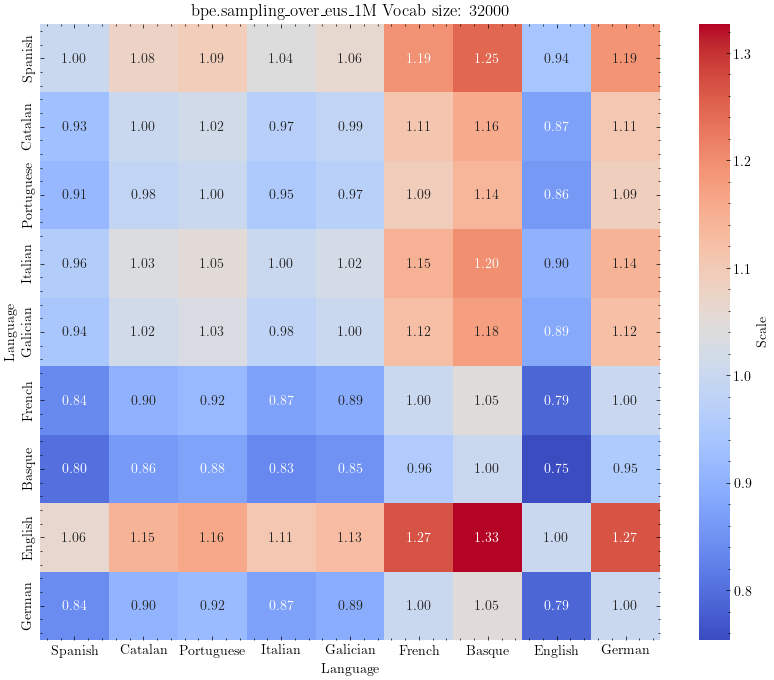

Computing relative fertility for unigram.sampling_over_eus_eng_1M


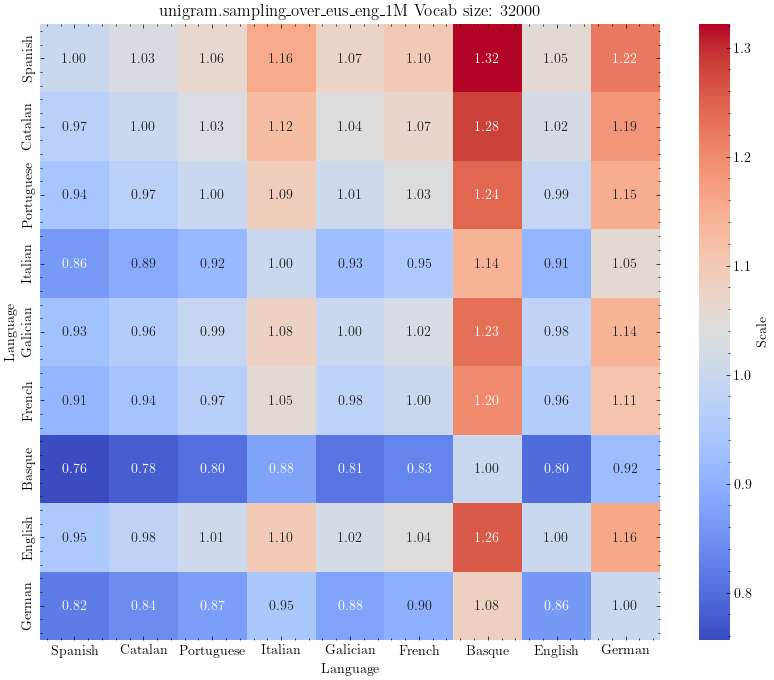

Computing relative fertility for bpe.sampling_over_eus_eng_1M


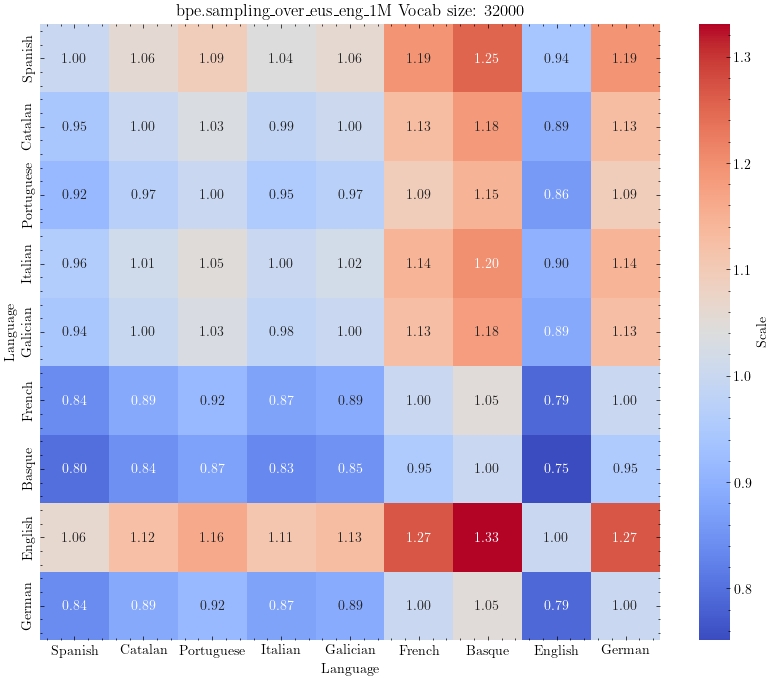

Computing relative fertility for unigram.sampling_over_eus2_1M


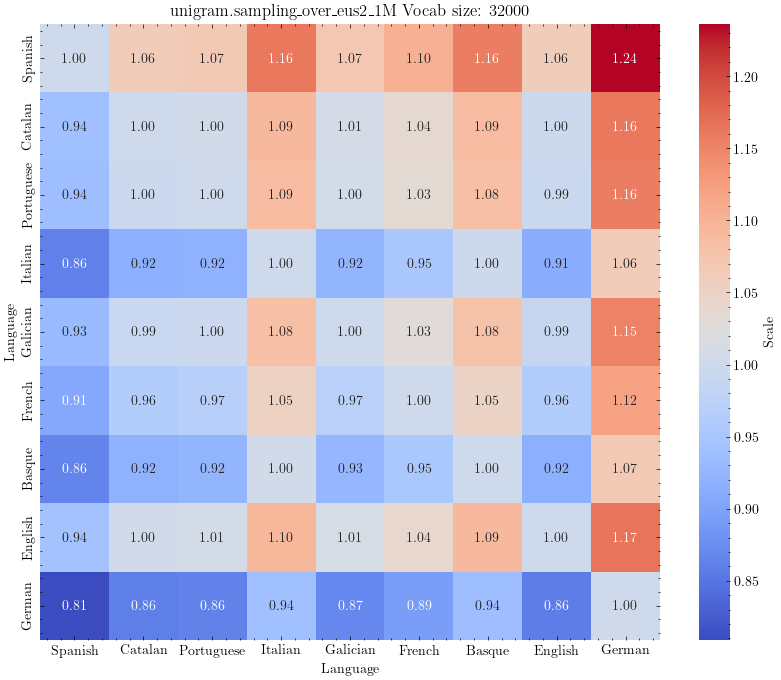

Computing relative fertility for bpe.sampling_over_eus2_1M


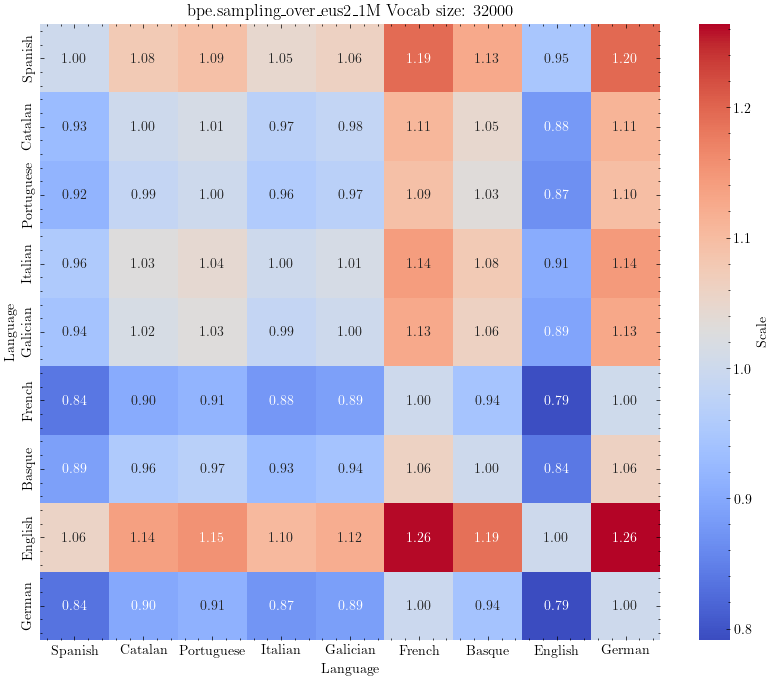

Computing relative fertility for unigram.sampling_over_eus_deu_eng_1M


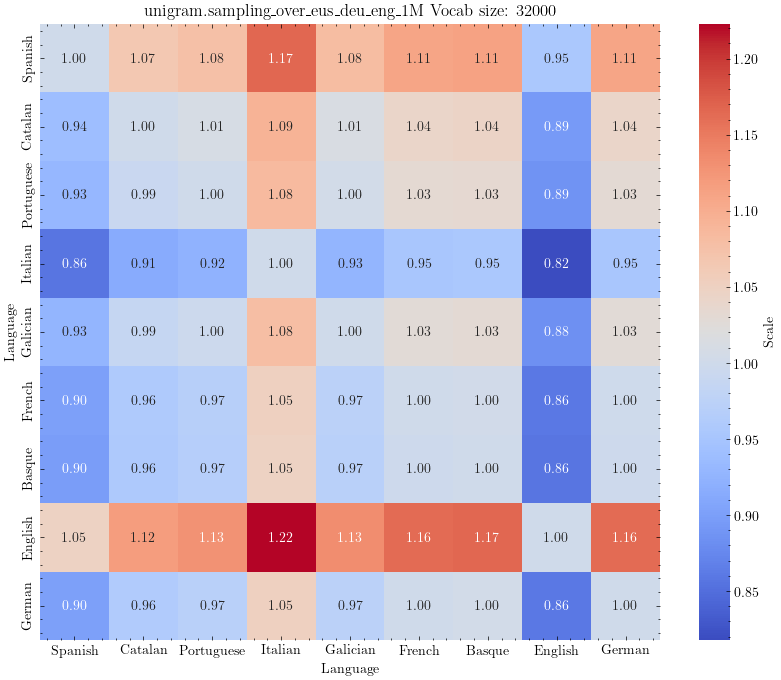

Computing relative fertility for bpe.sampling_over_eus_deu_eng_1M


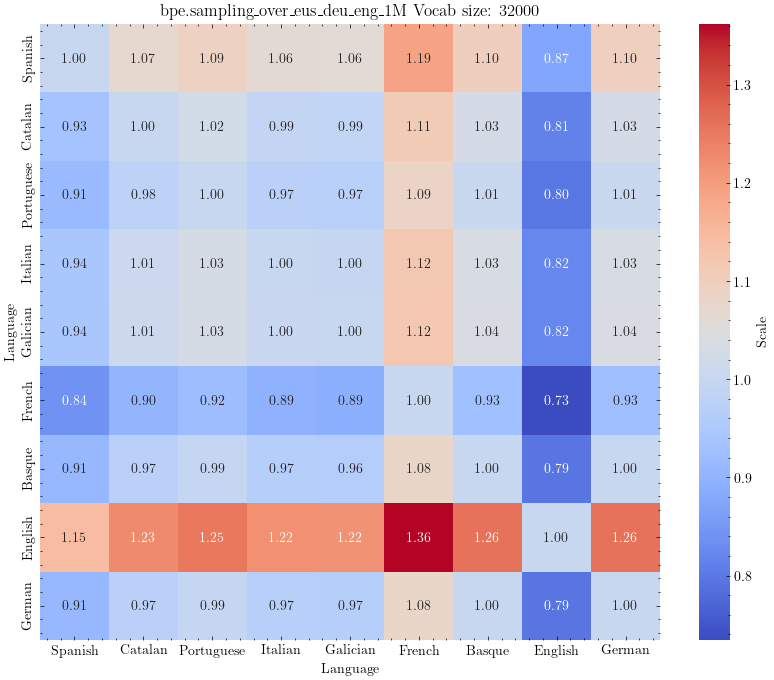

Computing relative fertility for unigram.sampling_over_eus3_1M


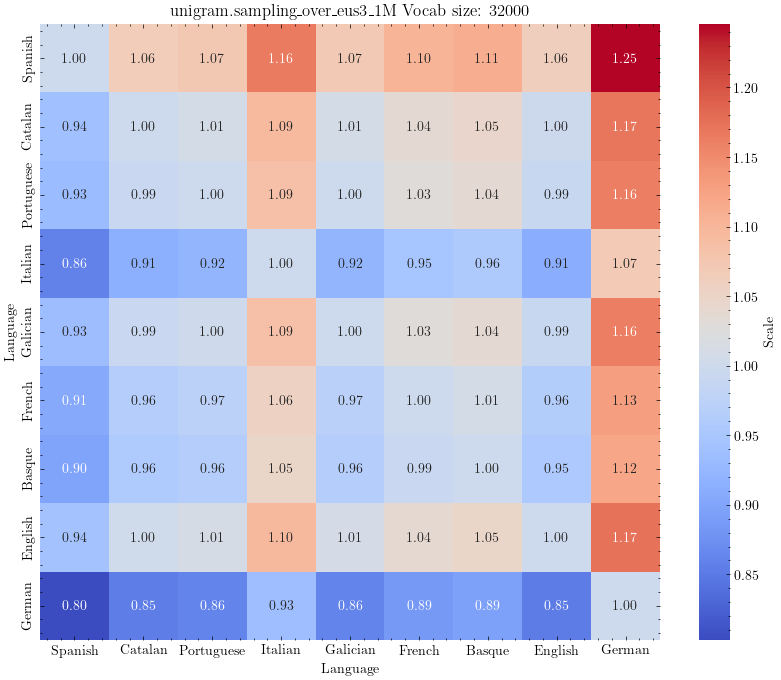

Computing relative fertility for bpe.sampling_over_eus3_1M


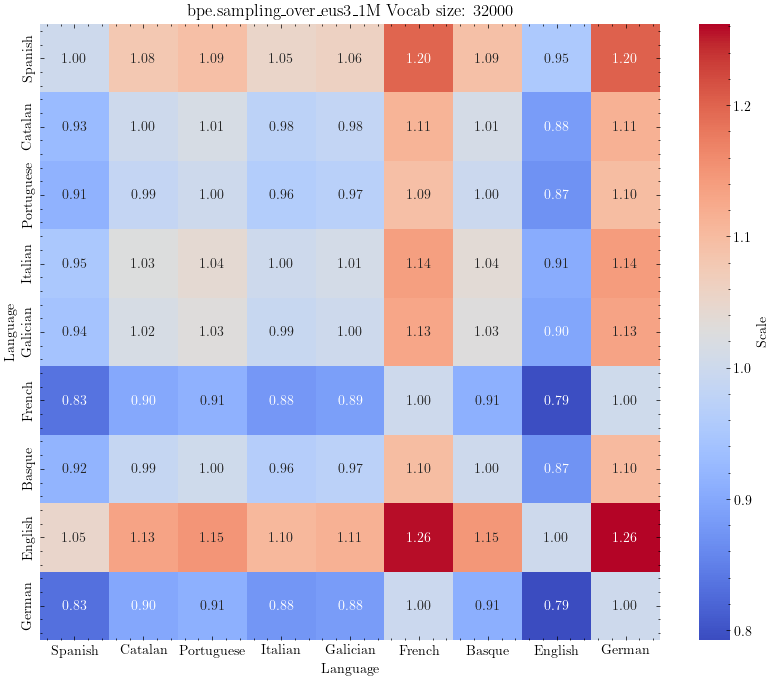

Computing relative fertility for unigram.sampling_equal_1M


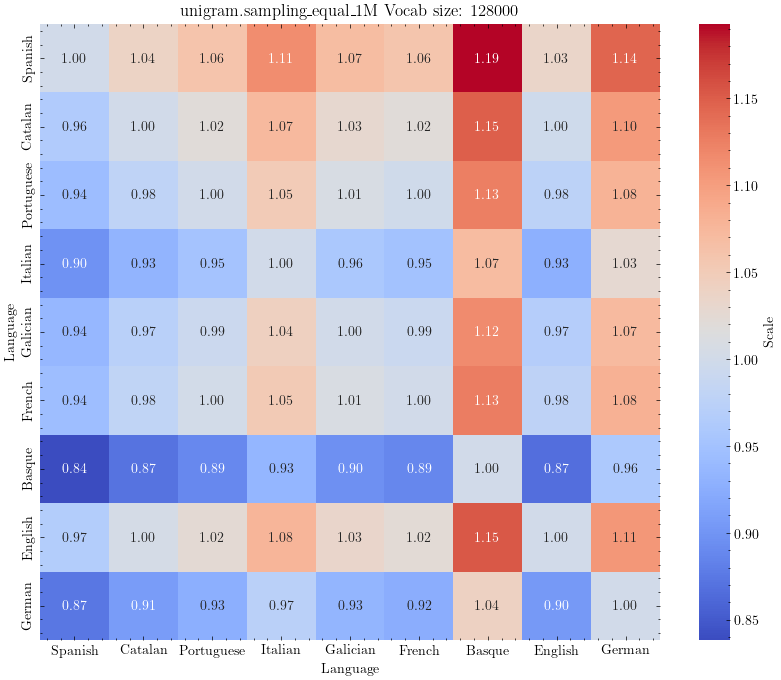

Computing relative fertility for unigram.sampling_equal_2M


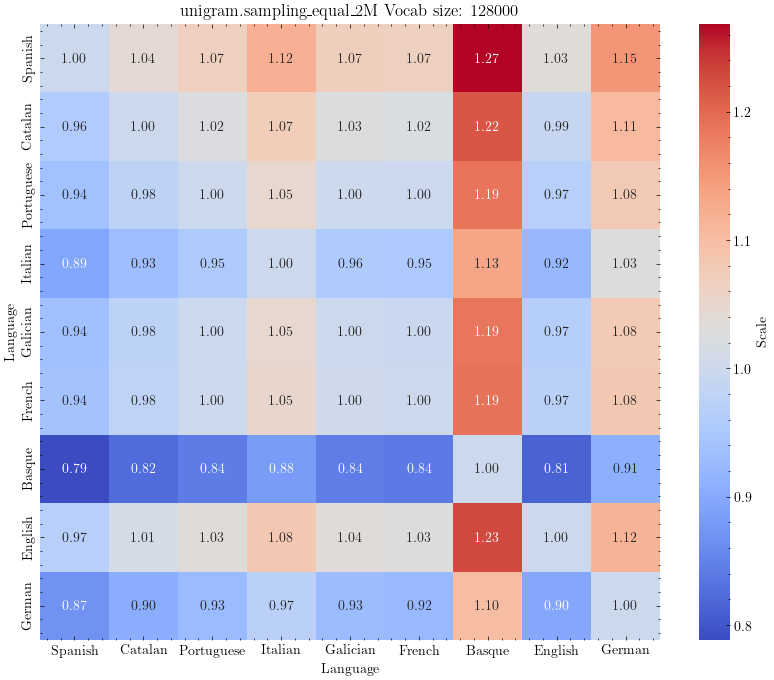

Computing relative fertility for unigram.sampling_equal_4M


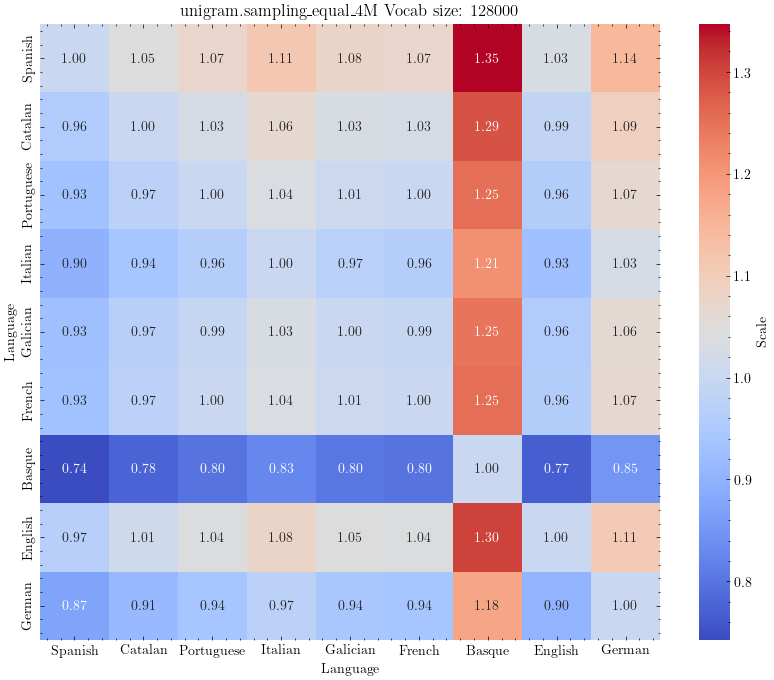

Computing relative fertility for unigram.sampling_equal_6M


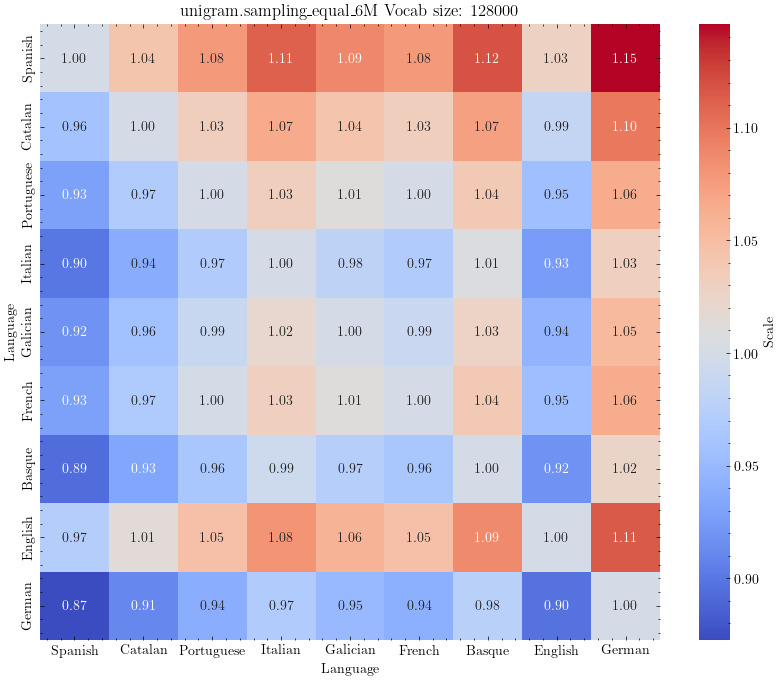

Computing relative fertility for bpe.sampling_equal_1M


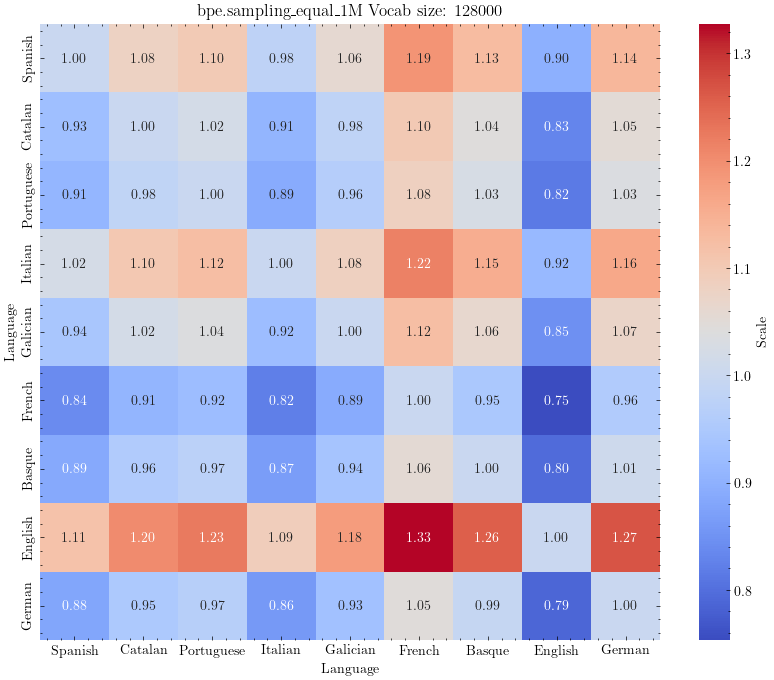

Computing relative fertility for bpe.sampling_equal_2M


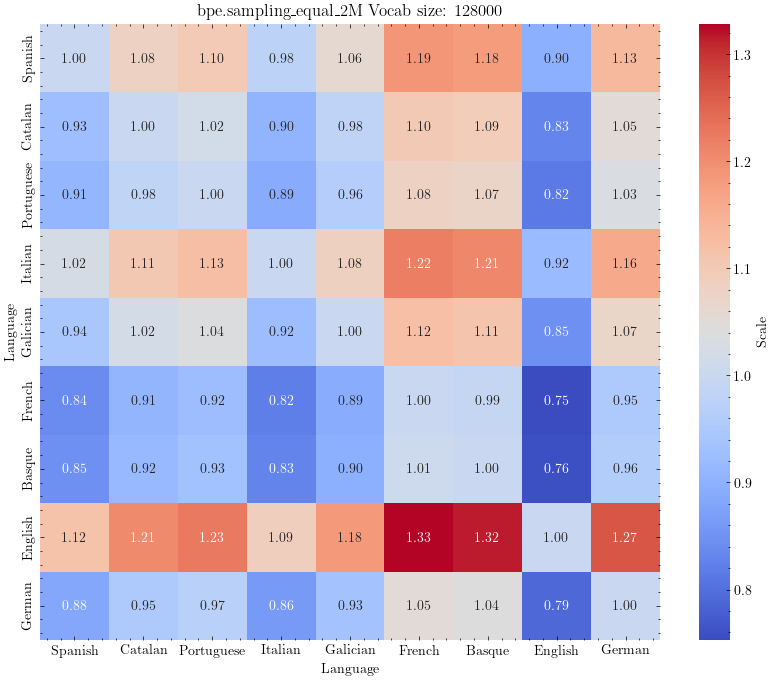

Computing relative fertility for bpe.sampling_equal_4M


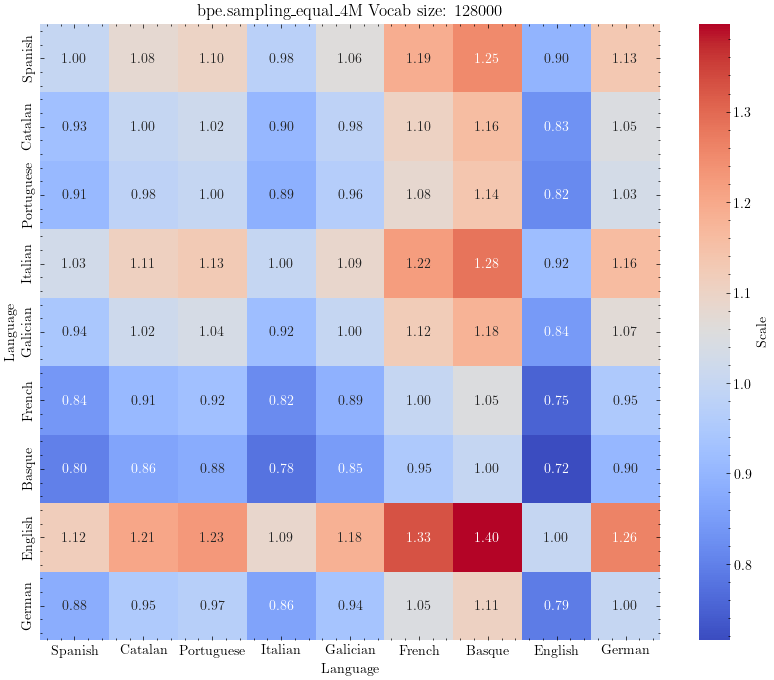

Computing relative fertility for bpe.sampling_equal_6M


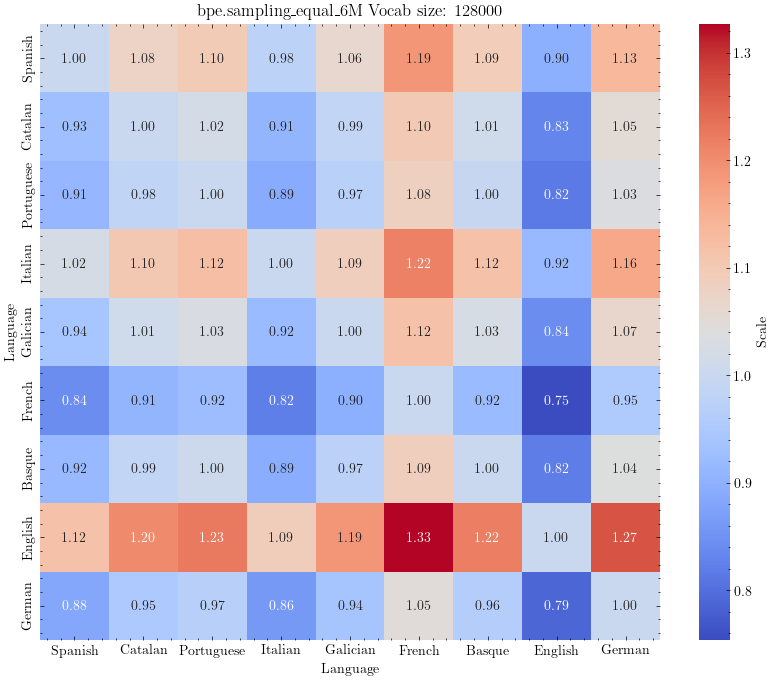

Computing relative fertility for unigram.sampling_over_eus_1M


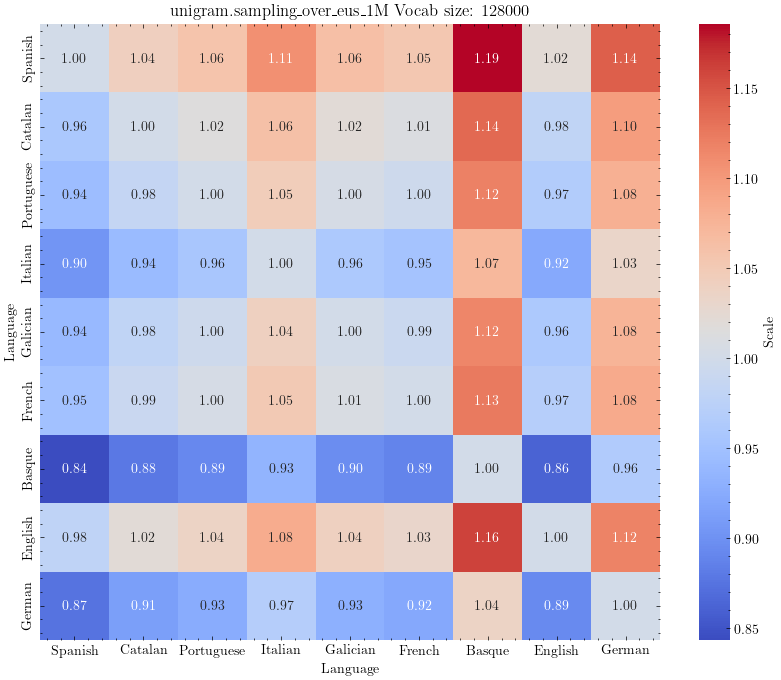

Computing relative fertility for bpe.sampling_over_eus_1M


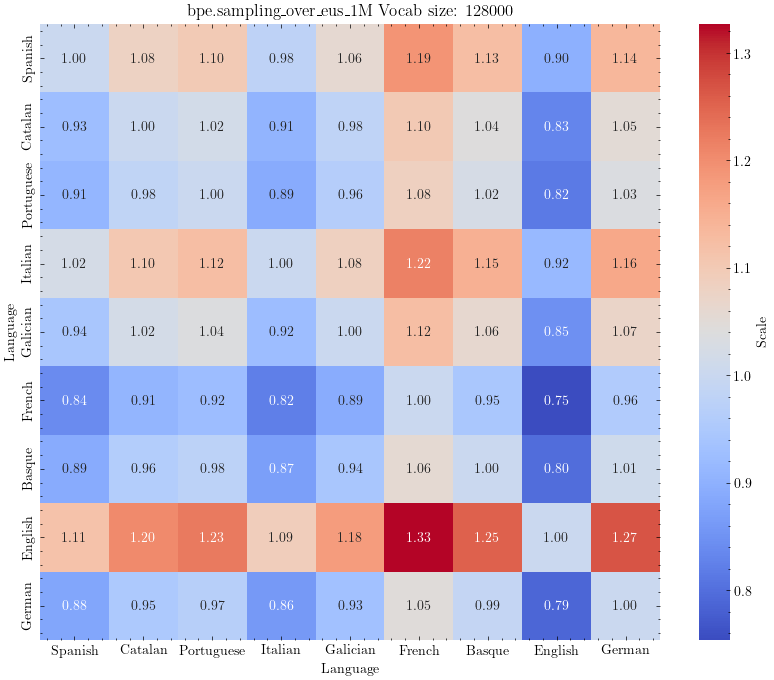

Computing relative fertility for unigram.sampling_over_eus_eng_1M


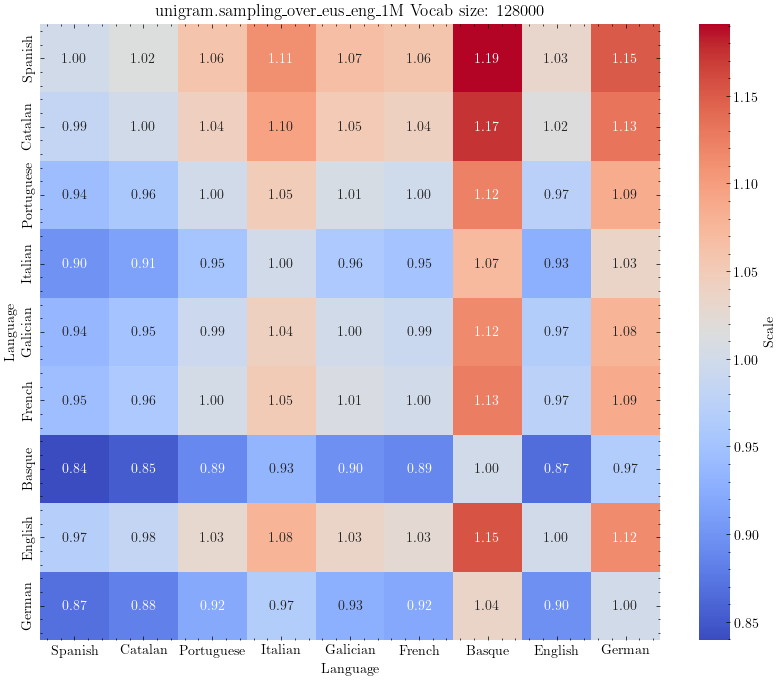

Computing relative fertility for bpe.sampling_over_eus_eng_1M


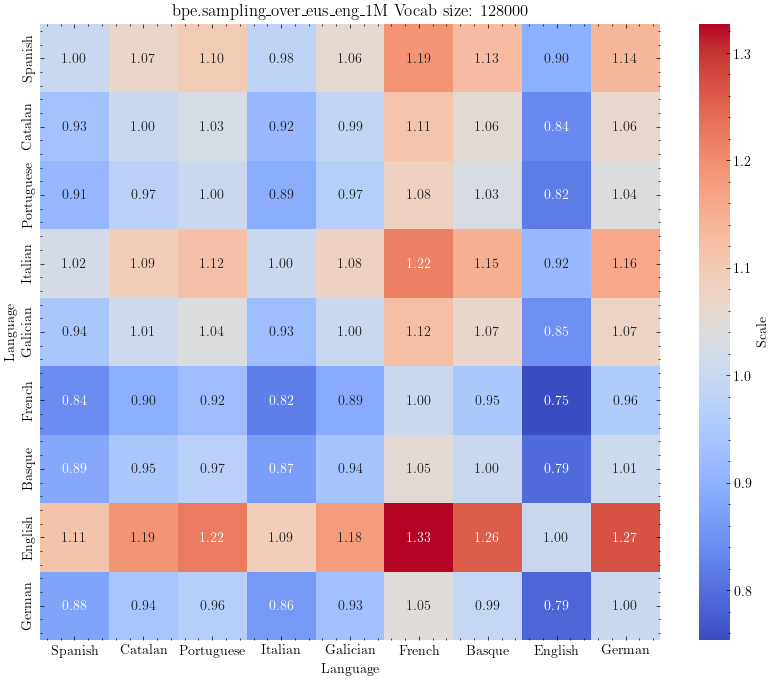

Computing relative fertility for unigram.sampling_over_eus2_1M


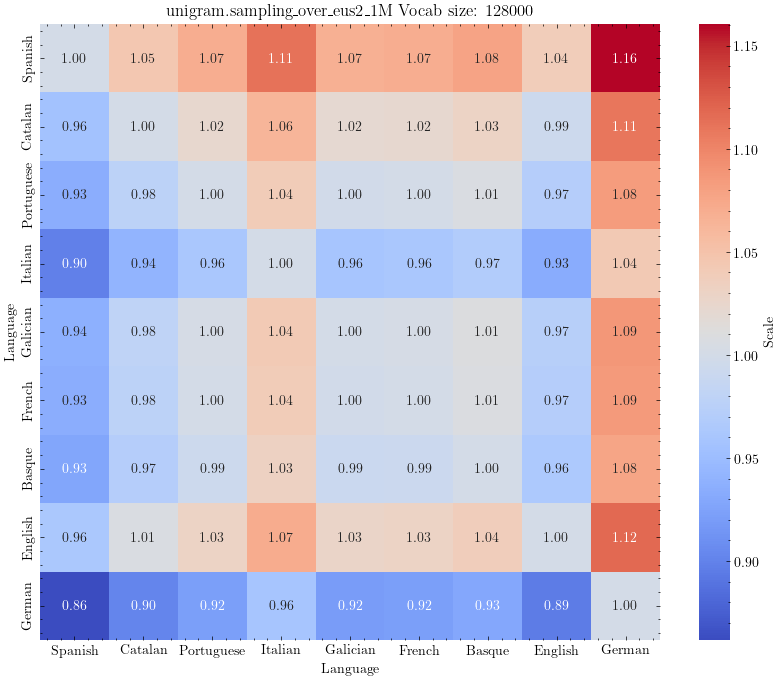

Computing relative fertility for bpe.sampling_over_eus2_1M


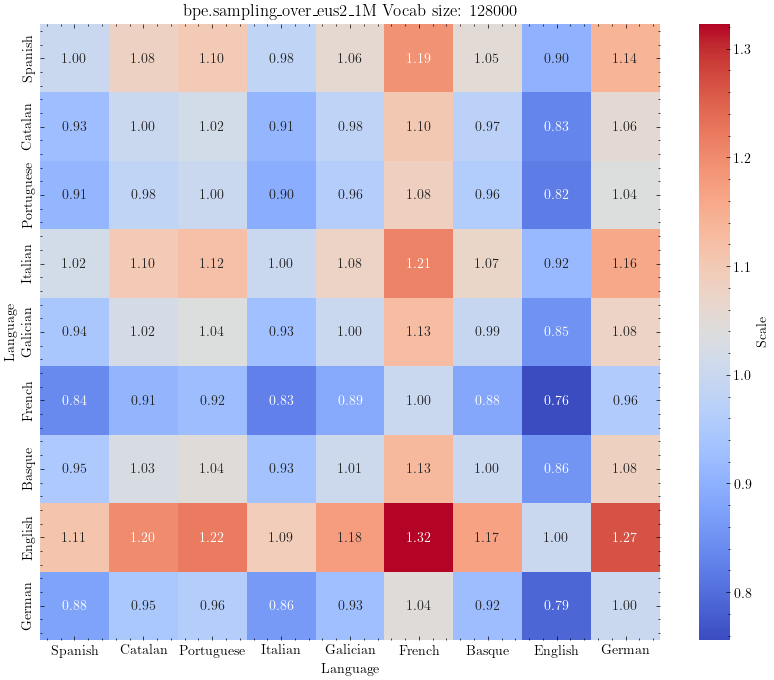

Computing relative fertility for unigram.sampling_over_eus_deu_eng_1M


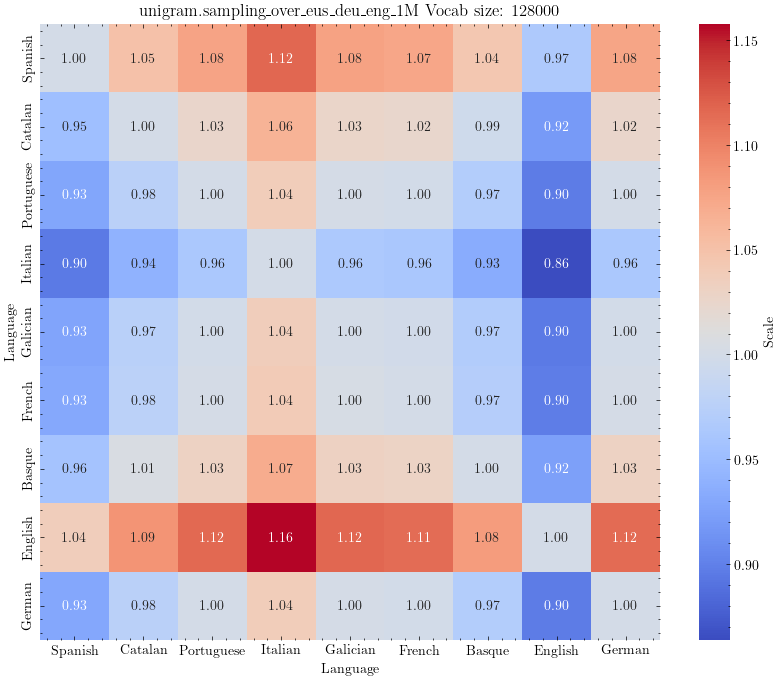

Computing relative fertility for bpe.sampling_over_eus_deu_eng_1M


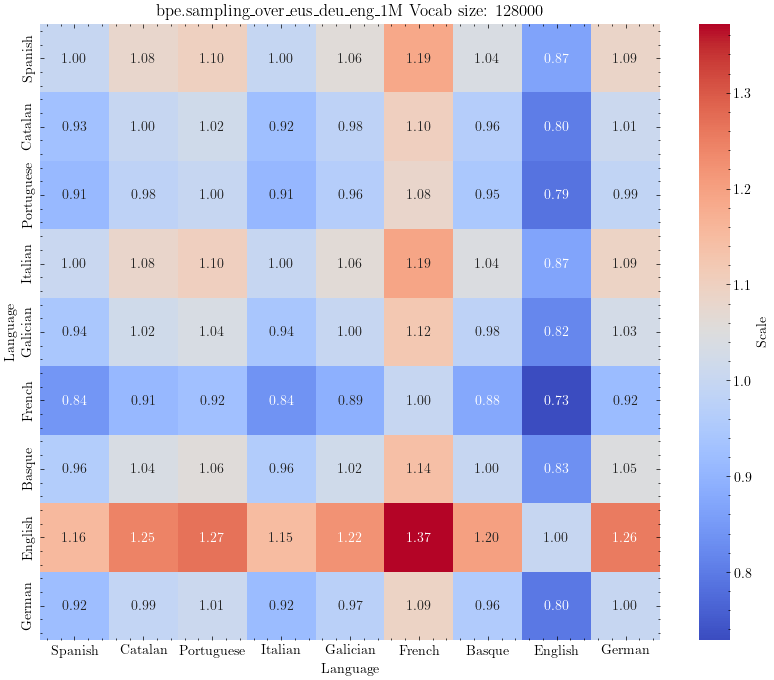

Computing relative fertility for unigram.sampling_over_eus3_1M


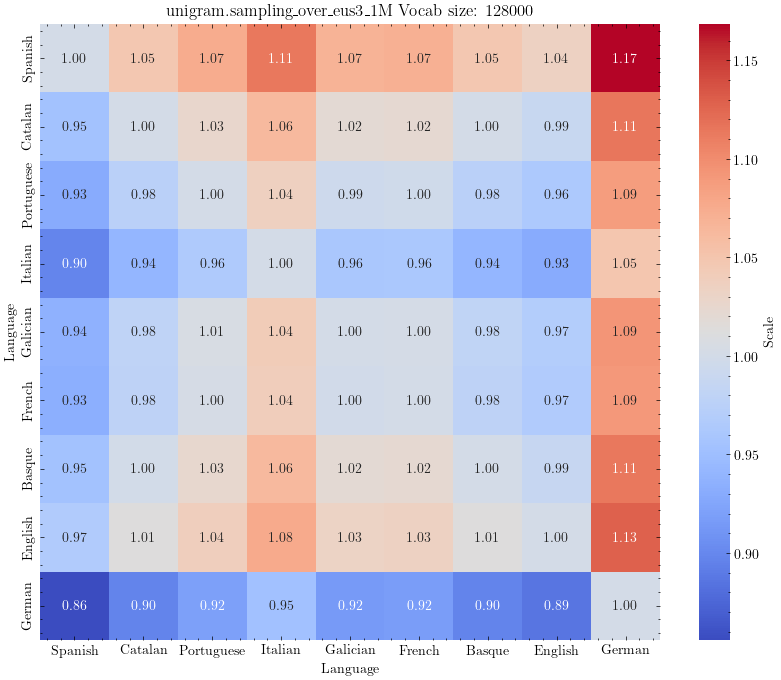

Computing relative fertility for bpe.sampling_over_eus3_1M


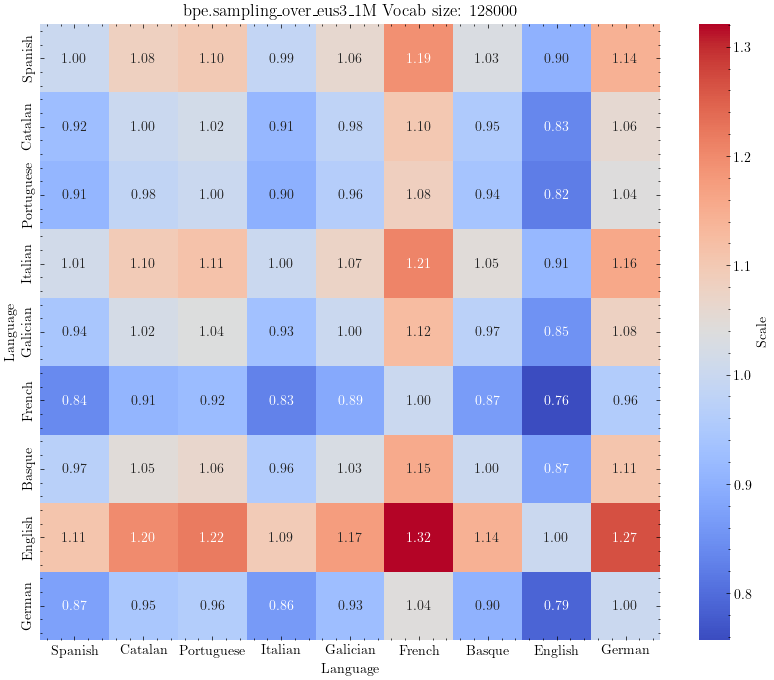

Computing relative fertility for unigram.sampling_equal_1M


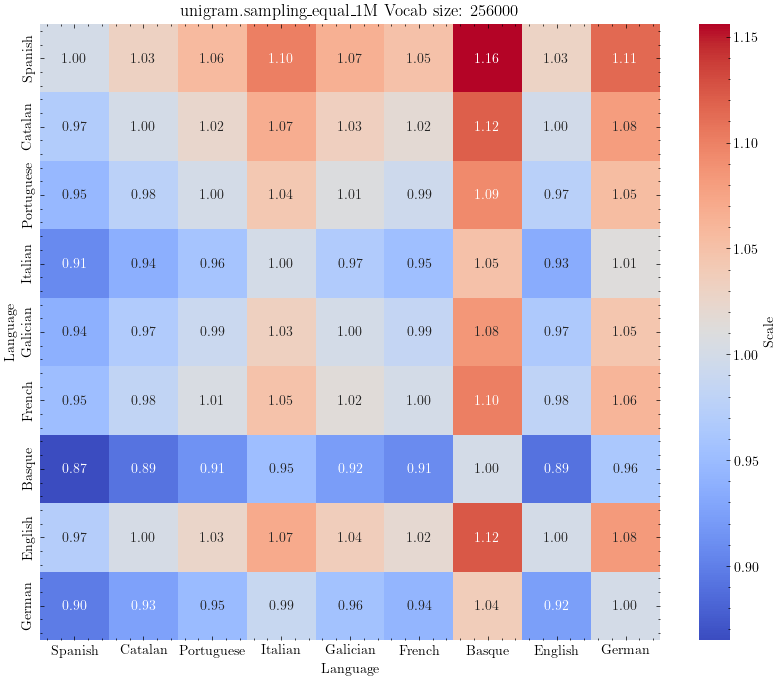

Computing relative fertility for unigram.sampling_equal_2M


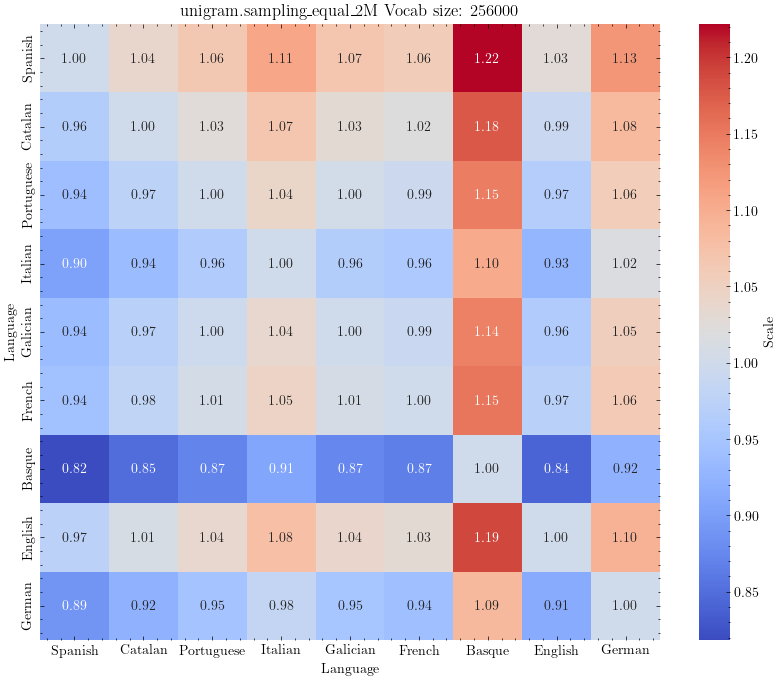

Computing relative fertility for unigram.sampling_equal_4M


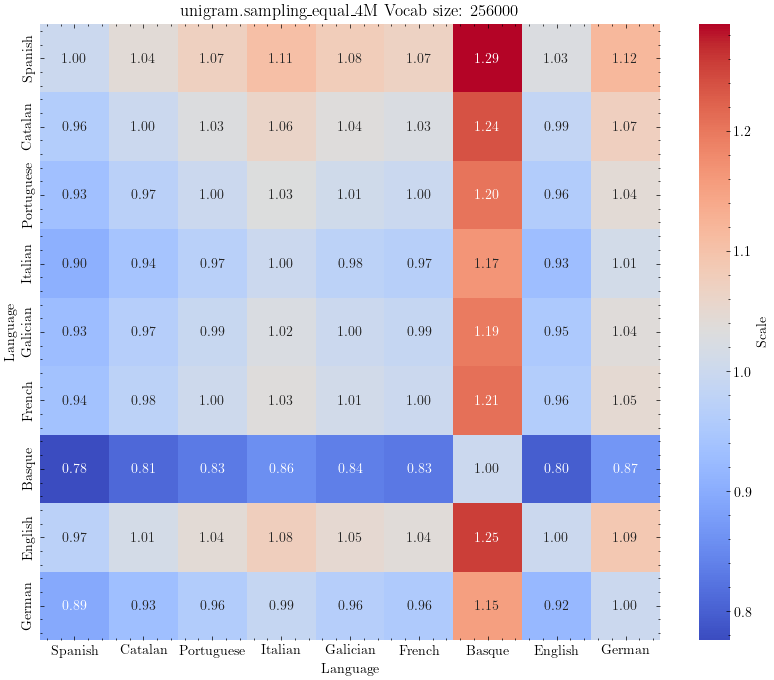

Computing relative fertility for unigram.sampling_equal_6M


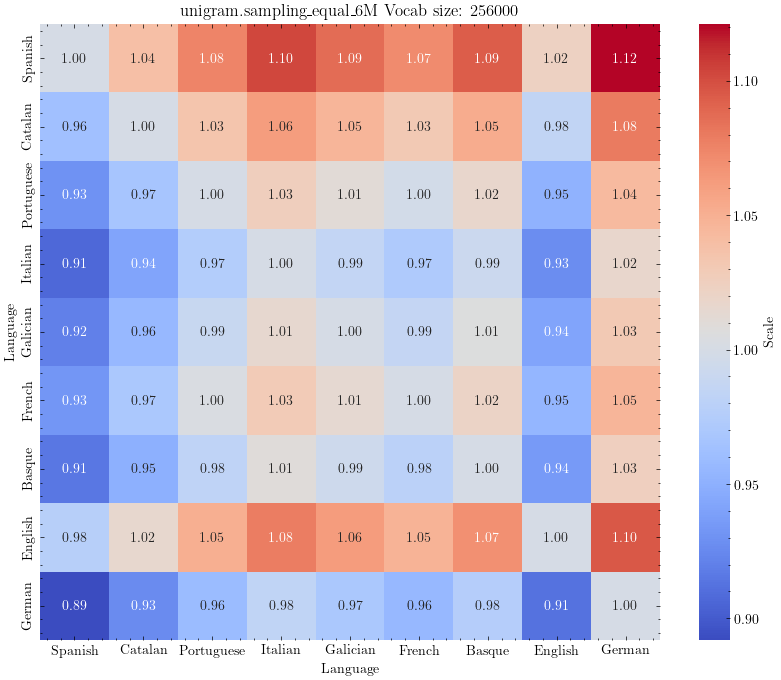

Computing relative fertility for bpe.sampling_equal_1M


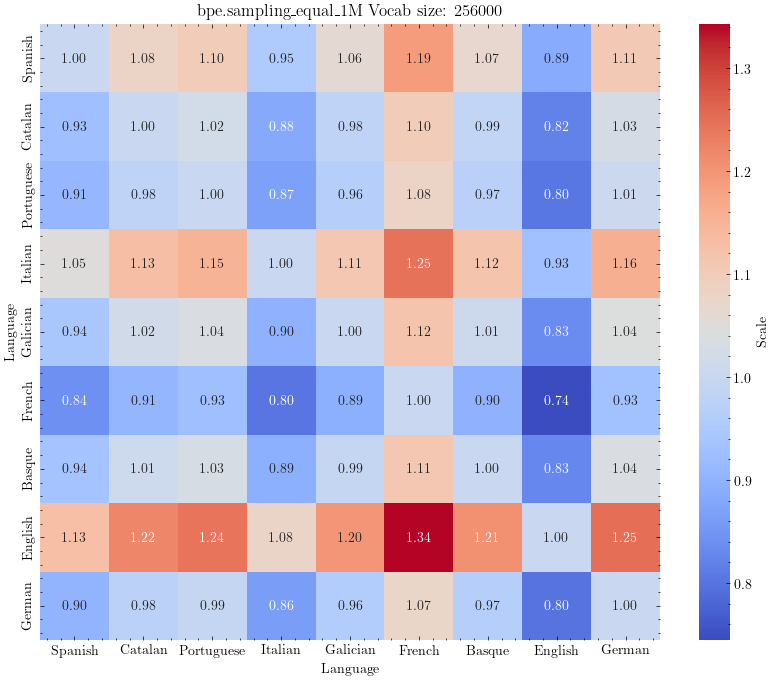

Computing relative fertility for bpe.sampling_equal_2M


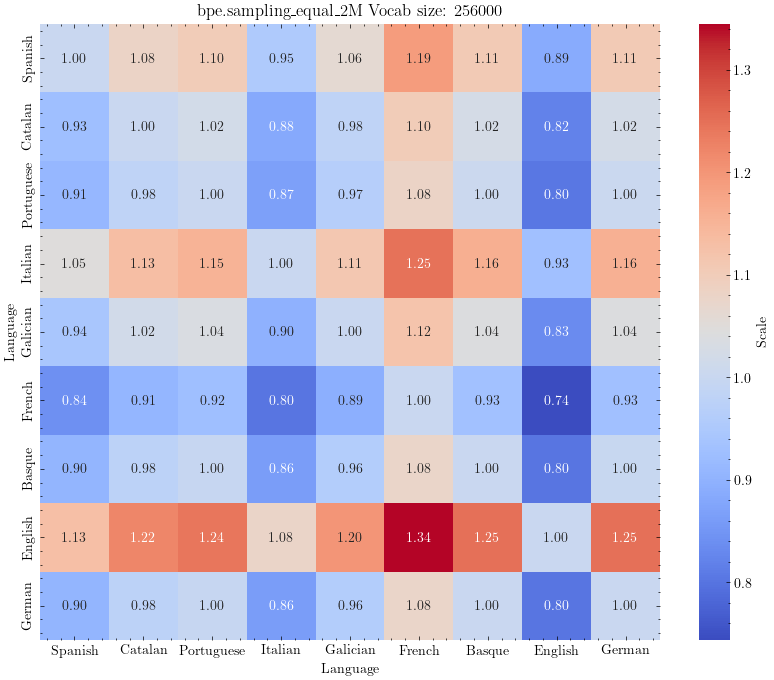

Computing relative fertility for bpe.sampling_equal_4M


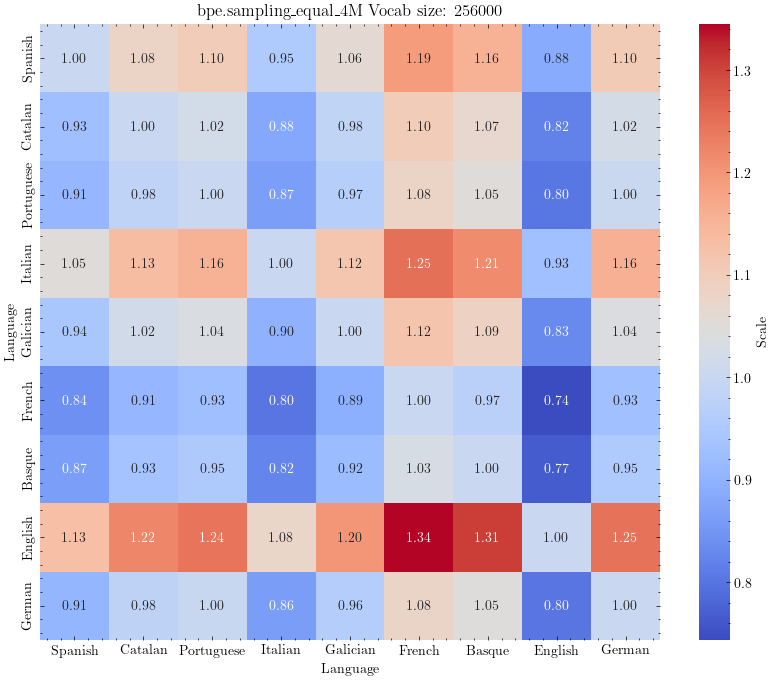

Computing relative fertility for bpe.sampling_equal_6M


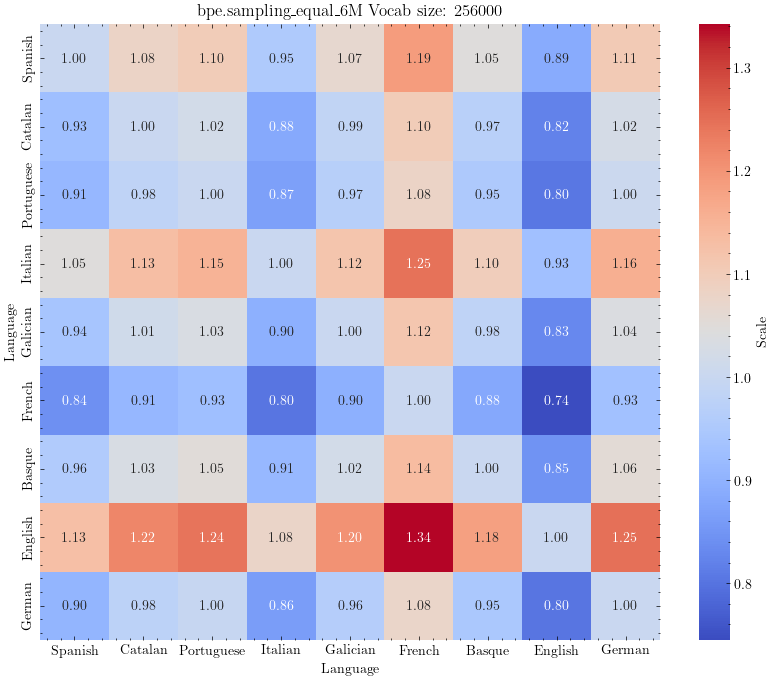

Computing relative fertility for unigram.sampling_over_eus_1M


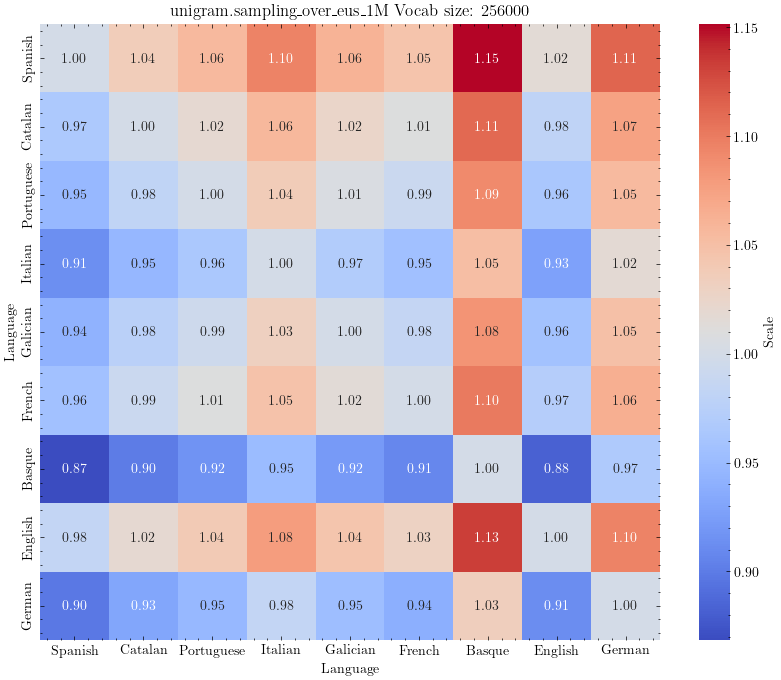

Computing relative fertility for bpe.sampling_over_eus_1M


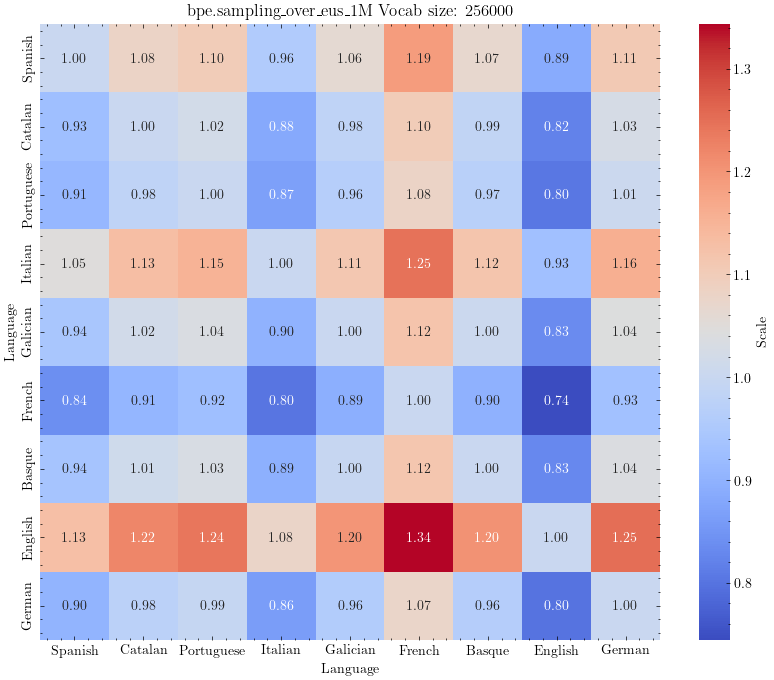

Computing relative fertility for unigram.sampling_over_eus_eng_1M


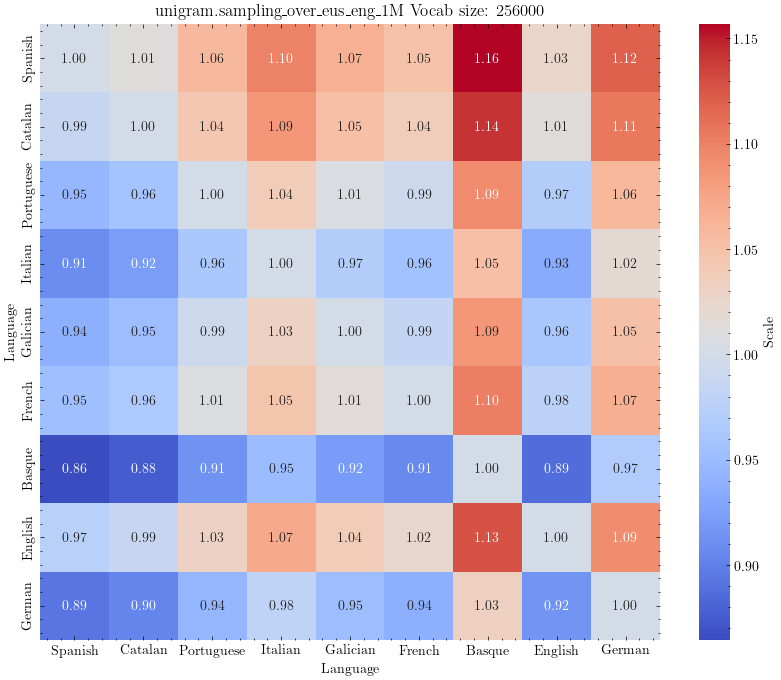

Computing relative fertility for bpe.sampling_over_eus_eng_1M


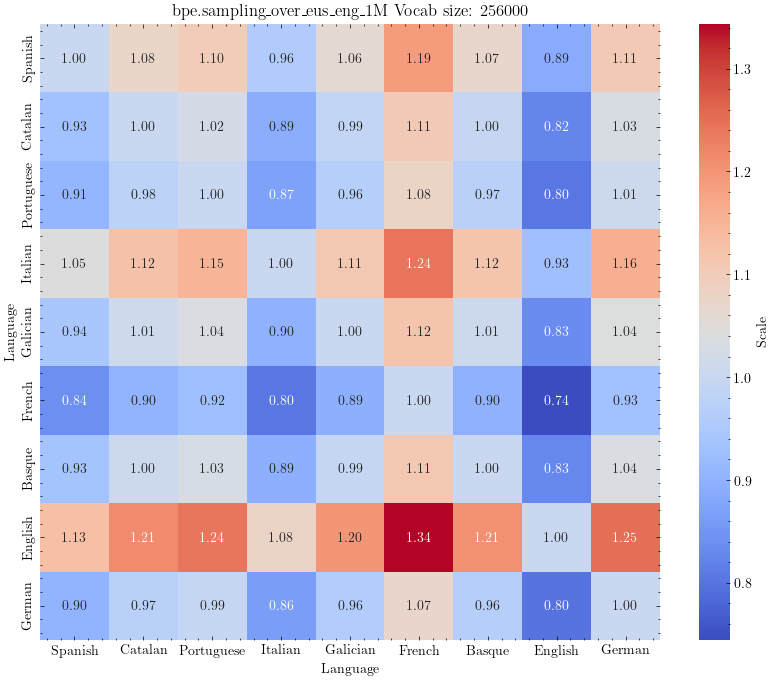

Computing relative fertility for unigram.sampling_over_eus2_1M


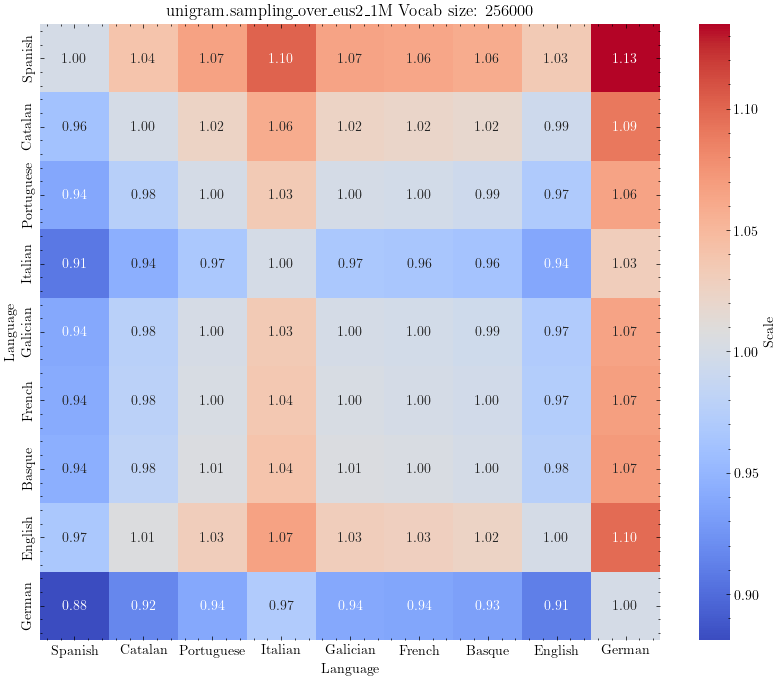

Computing relative fertility for bpe.sampling_over_eus2_1M


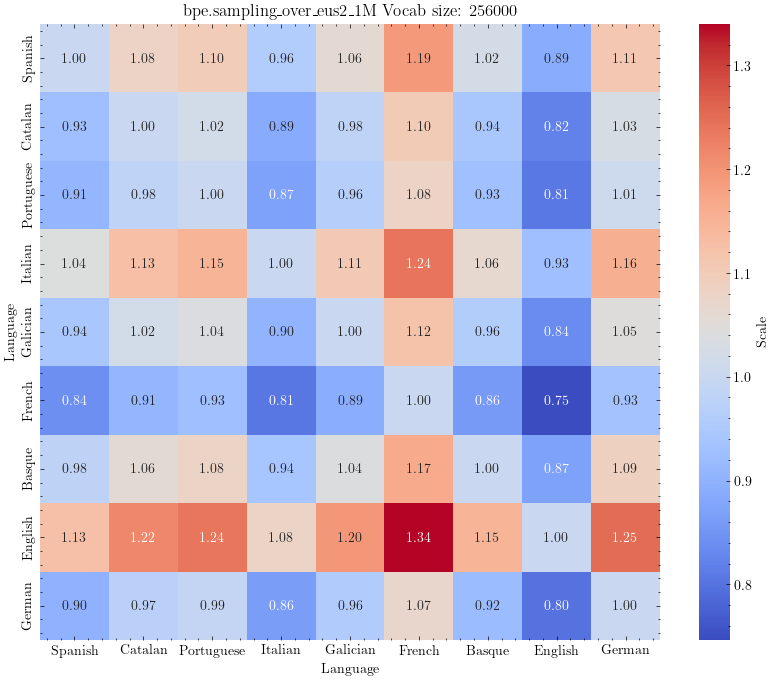

Computing relative fertility for unigram.sampling_over_eus_deu_eng_1M


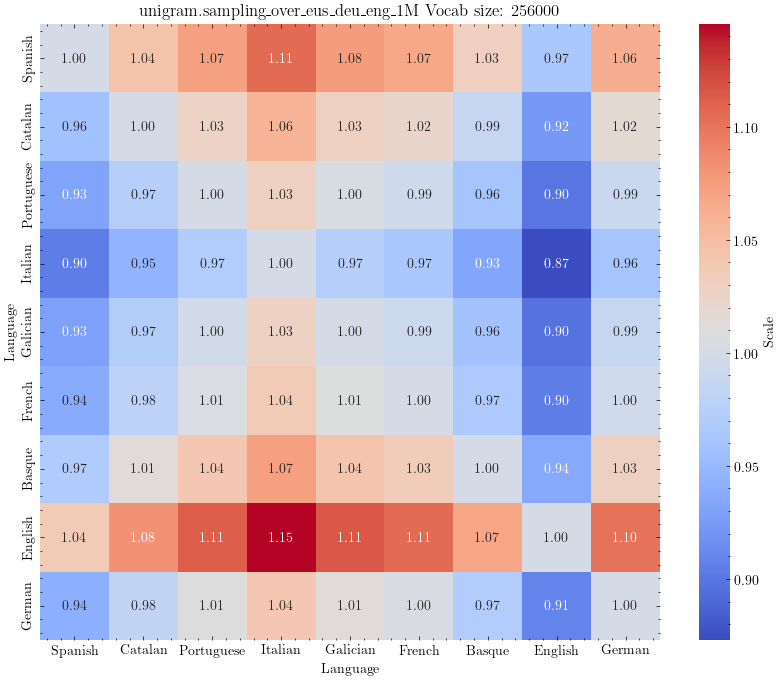

Computing relative fertility for bpe.sampling_over_eus_deu_eng_1M


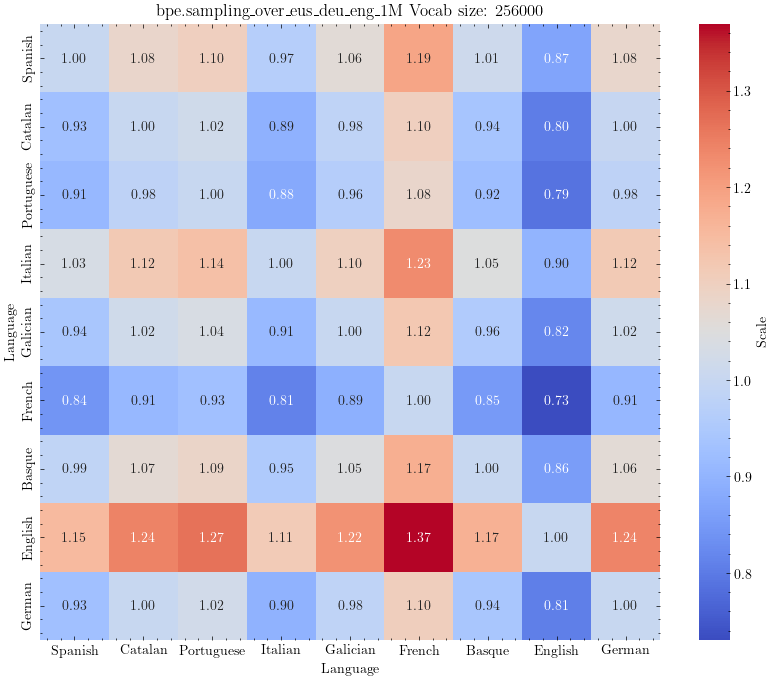

Computing relative fertility for unigram.sampling_over_eus3_1M


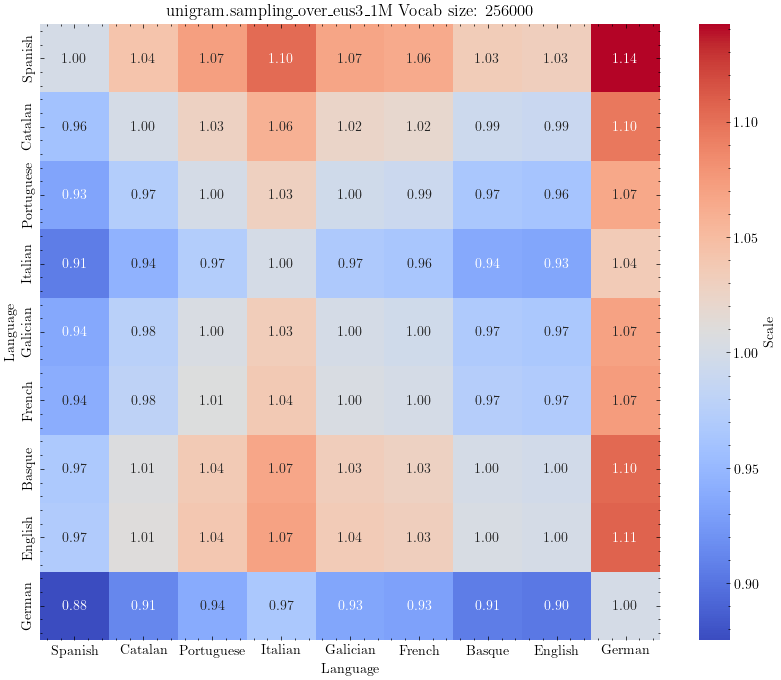

Computing relative fertility for bpe.sampling_over_eus3_1M


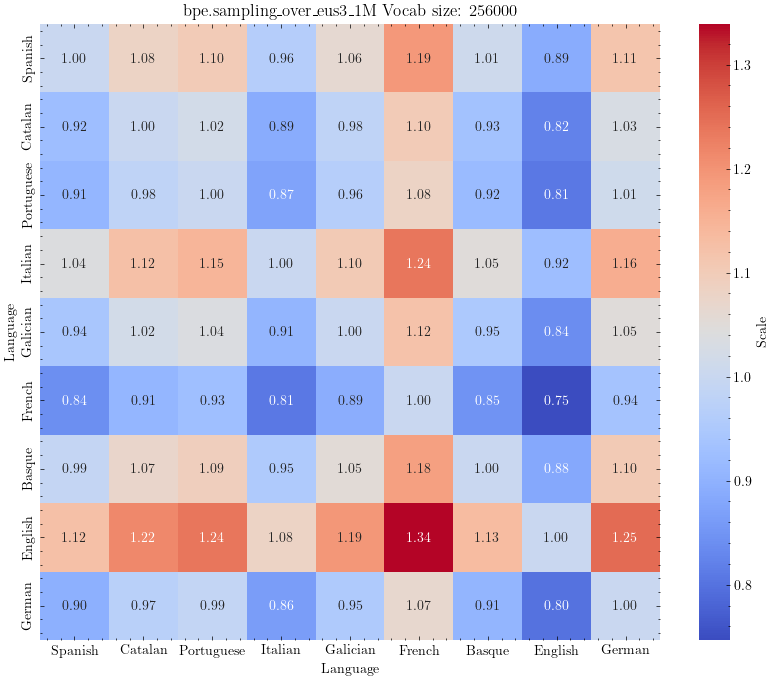

In [ ]:
import seaborn as sns

for i, vocab in enumerate([32000, 128000, 256000]):
  for name_method in data['Spanish']:
    print('Computing relative fertility for {}'.format(name_method) )
    matrix = {}
    for lang, lang_results in data.items():
      fertility_main = lang_results[name_method]['values'][i]
      matrix[lang] = []
      for lang2, lang_results2 in data.items():
        feritlity_sub = lang_results2[name_method]['values'][i]
        relative_fertility = fertility_main / feritlity_sub
        matrix[lang].append(relative_fertility)
    df_plot = pd.DataFrame(matrix, index=['Spanish', 'Catalan', 'Portuguese', 'Italian', 'Galician', 'French', 'Basque', 'English', 'German'])

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_plot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Scale'})
    plt.title('{} Vocab size: {}'.format(name_method, vocab))
    plt.xlabel('Language')
    plt.ylabel('Language')
    plt.savefig( '{}_{}.png'.format(name_method, vocab), dpi = 300 )
    plt.show()